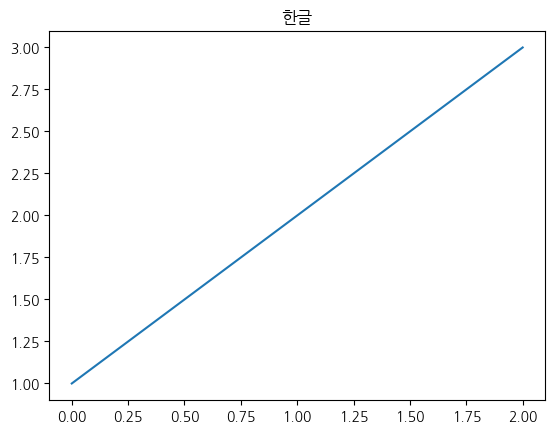

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 데이터 불러오기(길단위 추정인구 강남 강북 강서)

In [2]:
df1 = pd.read_csv('data/길단위추정인구_유동삭제.csv')
df1.head(3)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,13934112,313406,558682,11305534,12571,27099,692,812,895,1244,1749,1936,1611,1945,1778,2318,2376,2455,2253,1617,1320,1090,1007,351,414,460,642,871,998,843,1050,912,1196,1170,1224,1081,745,624,474,380,341,398,435,602,878,938,768,895,867,1122,1206,1231,1172,872,696,616,627
1,14161464,313103,558258,11305534,10798,25747,813,1086,1144,1429,1586,1505,1385,1950,1962,2505,2214,2106,1887,1357,1100,894,824,422,564,582,738,809,774,678,999,963,1267,1109,1053,899,622,509,379,296,391,522,562,691,778,731,708,951,999,1239,1105,1053,988,735,591,515,528
2,14474744,313577,558711,11305534,13246,28041,673,801,894,1246,1868,2092,1705,1993,1829,2374,2450,2548,2343,1665,1371,1145,1043,343,411,464,642,888,1062,898,1067,938,1220,1204,1256,1130,767,636,501,391,330,390,430,603,981,1030,807,927,892,1154,1246,1292,1213,898,735,644,652


In [3]:
#엑셀불러오기 라이브러리

In [4]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df2 = pd.read_excel('data/길단위추정인구_칼럼_유동삭제.xlsx')
df2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
칼럼명,유동인구고유ID,카텍X좌표,카텍Y좌표,행정동코드,가구수,인구수,연령0004인구수,연령0510인구수,연령1014인구수,연령1520인구수,연령2024인구수,연령2530인구수,연령3034인구수,연령3540인구수,연령4044인구수,연령4550인구수,연령5054인구수,연령5560인구수,연령6064인구수,연령6570인구수,연령7074인구수,연령7580인구수,연령80초과인구수,남자연령0004인구수,남자연령0510인구수,남자연령1014인구수,남자연령1520인구수,남자연령2024인구수,남자연령2530인구수,남자연령3034인구수,남자연령3540인구수,남자연령4044인구수,남자연령4550인구수,남자연령5054인구수,남자연령5560인구수,남자연령6064인구수,남자연령6570인구수,남자연령7074인구수,남자연령7580인구수,남자연령80초과인구수,여성연령0004인구수,여성연령0510인구수,여성연령1014인구수,여성연령1520인구수,여성연령2024인구수,여성연령2530인구수,여성연령3034인구수,여성연령3540인구수,여성연령4044인구수,여성연령4550인구수,여성연령5054인구수,여성연령5560인구수,여성연령6064인구수,여성연령6570인구수,여성연령7074인구수,여성연령7580인구수,여성연령80초과인구수


In [6]:
# 칼럼명을 수정한 리스트
new_column_names = [
    "유동인구고유ID", "카텍X좌표", "카텍Y좌표", "행정동코드", "가구수", "인구수", "연령0004인구수",
    "연령0510인구수", "연령1014인구수", "연령1520인구수", "연령2024인구수", "연령2530인구수", "연령3034인구수",
    "연령3540인구수", "연령4044인구수", "연령4550인구수", "연령5054인구수", "연령5560인구수", "연령6064인구수",
    "연령6570인구수", "연령7074인구수", "연령7580인구수", "연령80초과인구수", "남자연령0004인구수",
    "남자연령0510인구수", "남자연령1014인구수", "남자연령1520인구수", "남자연령2024인구수", "남자연령2530인구수",
    "남자연령3034인구수", "남자연령3540인구수", "남자연령4044인구수", "남자연령4550인구수", "남자연령5054인구수",
    "남자연령5560인구수", "남자연령6064인구수", "남자연령6570인구수", "남자연령7074인구수", "남자연령7580인구수",
    "남자연령80초과인구수", "여성연령0004인구수", "여성연령0510인구수", "여성연령1014인구수", "여성연령1520인구수",
    "여성연령2024인구수", "여성연령2530인구수", "여성연령3034인구수", "여성연령3540인구수", "여성연령4044인구수",
    "여성연령4550인구수", "여성연령5054인구수", "여성연령5560인구수", "여성연령6064인구수", "여성연령6570인구수",
    "여성연령7074인구수", "여성연령7580인구", "여성연령80초과인구수"]


# 데이터프레임의 칼럼명을 새로운 시리즈의 값으로 변경
df1.columns = new_column_names

In [7]:
df1[['카텍X좌표', '카텍Y좌표']].head(5)

,카텍X좌표,카텍Y좌표
0,313406,558682
1,313103,558258
2,313577,558711
3,313465,558480
4,313058,558023


In [8]:
df1['행정동코드'].value_counts().sort_index(ascending=True)

행정동코드
11305534    3383
11305535    2947
11305545    4022
11305555    4162
11305575     810
11305595    2540
11305603    1679
11305608    1095
11305615    3231
11305625    2342
11305635    3105
11305645    5156
11305660    4434
11500510    2737
11500520    1576
11500530    1781
11500535    2118
11500540    4578
11500550    1628
11500560    1333
11500570    1961
11500590    2821
11500591    2346
11500593    2052
11500603    5647
11500604     851
11500605     651
11500611    3633
11500615    2349
11500620    4803
11500630    3249
11500640    4917
11500641    2150
11680510    3170
11680521    4091
11680531    4694
11680545    4168
11680565    4601
11680580    3393
11680590    2745
11680600     999
11680610    3484
11680630    2341
11680640    7131
11680650    2838
11680655    1701
11680656    1484
11680660     740
11680670    1766
11680690    2530
11680700    4501
11680720    1524
11680730    1820
11680740    1114
11680750    1750
Name: count, dtype: int64

In [9]:
# '행정동코드'가 11680660 인 행만 추출
df_fil = df1[df1['행정동코드'] == 11680660].head(500)
df_fil.head(3)

,유동인구고유ID,카텍X좌표,카텍Y좌표,행정동코드,가구수,인구수,연령0004인구수,연령0510인구수,연령1014인구수,연령1520인구수,연령2024인구수,연령2530인구수,연령3034인구수,연령3540인구수,연령4044인구수,연령4550인구수,연령5054인구수,연령5560인구수,연령6064인구수,연령6570인구수,연령7074인구수,연령7580인구수,연령80초과인구수,남자연령0004인구수,남자연령0510인구수,남자연령1014인구수,남자연령1520인구수,남자연령2024인구수,남자연령2530인구수,남자연령3034인구수,남자연령3540인구수,남자연령4044인구수,남자연령4550인구수,남자연령5054인구수,남자연령5560인구수,남자연령6064인구수,남자연령6570인구수,남자연령7074인구수,남자연령7580인구수,남자연령80초과인구수,여성연령0004인구수,여성연령0510인구수,여성연령1014인구수,여성연령1520인구수,여성연령2024인구수,여성연령2530인구수,여성연령3034인구수,여성연령3540인구수,여성연령4044인구수,여성연령4550인구수,여성연령5054인구수,여성연령5560인구수,여성연령6064인구수,여성연령6570인구수,여성연령7074인구수,여성연령7580인구,여성연령80초과인구수
126146,32323461,316842,542997,11680660,6655,13845,395,641,766,937,930,832,722,903,1026,1347,1233,1088,990,770,569,341,357,202,322,360,433,448,408,337,396,445,626,612,548,469,366,291,177,137,193,319,406,504,482,424,384,506,581,721,621,540,522,404,277,164,220
126147,32820393,317190,542082,11680660,3829,5445,135,205,242,317,362,354,301,354,358,458,480,473,467,360,261,160,159,67,101,122,151,181,181,149,166,163,217,236,238,221,171,131,80,59,68,103,120,165,181,173,153,188,195,241,245,234,246,189,129,80,100
126148,9375021,317321,542221,11680660,4822,8378,227,331,392,532,577,537,461,549,560,733,758,716,686,527,368,211,214,110,165,196,257,290,272,230,256,250,339,369,364,325,249,192,107,75,118,165,196,276,287,265,231,293,310,394,389,352,361,278,176,103,139


In [10]:
pip install pyproj

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# 출처 https://velog.io/@garam/KATEC-WGS84-%EC%A2%8C%ED%91%9C-%EB%B3%80%ED%99%98%ED%95%98%EA%B8%B0-M1-python

In [12]:
from pyproj import transform
from pyproj import Proj

def KATEC_to_wgs84(x, y):
    WGS84 = {'proj': 'latlong', 'datum': 'WGS84', 'ellps': 'WGS84'}
    KATEC = {'proj': 'tmerc', 'lat_0': '38N', 'lon_0': '128E', 
             'ellps': 'bessel', 'x_0': '400000', 'y_0': '600000',
             'k': '0.9999', 'units': 'm',
             'towgs84': '-115.80,474.99,674.11,1.16,-2.31,-1.63,6.43'}

    inProj = Proj(**KATEC)
    outProj = Proj(**WGS84)
    return transform(inProj, outProj, x, y)

In [13]:
df_fil[['경도', '위도']] = df_fil.apply(lambda row: pd.Series(KATEC_to_wgs84(row['카텍X좌표'], row['카텍Y좌표'])), axis=1)
df_fil.head(4)

,유동인구고유ID,카텍X좌표,카텍Y좌표,행정동코드,가구수,인구수,연령0004인구수,연령0510인구수,연령1014인구수,연령1520인구수,연령2024인구수,연령2530인구수,연령3034인구수,연령3540인구수,연령4044인구수,연령4550인구수,연령5054인구수,연령5560인구수,연령6064인구수,연령6570인구수,연령7074인구수,연령7580인구수,연령80초과인구수,남자연령0004인구수,남자연령0510인구수,남자연령1014인구수,남자연령1520인구수,남자연령2024인구수,남자연령2530인구수,남자연령3034인구수,남자연령3540인구수,남자연령4044인구수,남자연령4550인구수,남자연령5054인구수,남자연령5560인구수,남자연령6064인구수,남자연령6570인구수,남자연령7074인구수,남자연령7580인구수,남자연령80초과인구수,여성연령0004인구수,여성연령0510인구수,여성연령1014인구수,여성연령1520인구수,여성연령2024인구수,여성연령2530인구수,여성연령3034인구수,여성연령3540인구수,여성연령4044인구수,여성연령4550인구수,여성연령5054인구수,여성연령5560인구수,여성연령6064인구수,여성연령6570인구수,여성연령7074인구수,여성연령7580인구,여성연령80초과인구수,경도,위도
126146,32323461,316842,542997,11680660,6655,13845,395,641,766,937,930,832,722,903,1026,1347,1233,1088,990,770,569,341,357,202,322,360,433,448,408,337,396,445,626,612,548,469,366,291,177,137,193,319,406,504,482,424,384,506,581,721,621,540,522,404,277,164,220,127.057486,37.485378
126147,32820393,317190,542082,11680660,3829,5445,135,205,242,317,362,354,301,354,358,458,480,473,467,360,261,160,159,67,101,122,151,181,181,149,166,163,217,236,238,221,171,131,80,59,68,103,120,165,181,173,153,188,195,241,245,234,246,189,129,80,100,127.061523,37.477165
126148,9375021,317321,542221,11680660,4822,8378,227,331,392,532,577,537,461,549,560,733,758,716,686,527,368,211,214,110,165,196,257,290,272,230,256,250,339,369,364,325,249,192,107,75,118,165,196,276,287,265,231,293,310,394,389,352,361,278,176,103,139,127.062989,37.478429
126149,21773953,317238,542164,11680660,4923,8078,214,314,372,501,551,521,447,529,538,699,725,693,670,514,363,212,214,104,157,186,241,277,264,222,248,242,326,354,352,317,243,187,108,77,110,158,186,260,274,256,224,282,296,373,372,342,352,271,175,105,138,127.062057,37.477908


In [14]:
import folium

# 지도 초기 위치를 설정합니다.
map_center = [df_fil['위도'].mean(), df_fil['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

# WGS84 좌표를 지도에 마커로 표시합니다.
for idx, row in df_fil.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)

# 100미터 반경의 원을 추가합니다.
folium.Circle(location=[37.478429, 127.061523], radius=100, color='blue', fill=True, fill_color='blue', fill_opacity=0.2).add_to(m)

# 지도를 저장하거나 출력합니다.
m.save('map_with_circle.html')
m


In [15]:
import folium
from math import atan2, radians, sin, cos, sqrt

# 함수 정의
def distance(lat1, lon1, lat2, lon2):
    # 두 점 간의 거리 계산 (단위: 미터)
    R = 6371000  # 지구 반지름 (미터)
    phi_1 = radians(lat1)
    phi_2 = radians(lat2)

    delta_phi = radians(lat2 - lat1)
    delta_lambda = radians(lon2 - lon1)

    a = sin(delta_phi/2)**2 + cos(phi_1) * cos(phi_2) * sin(delta_lambda/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

centers = [[37.478429, 127.061523], [37.483949, 127.052236], [37.479254, 127.064477], [37.482429, 127.060523]]

# 각 중심 좌표에 대해 처리
for center in centers:

    # 지도 생성
    m = folium.Map(location=center, zoom_start=15)

    # 100미터 반경의 원을 그림
    folium.Circle(location=center, radius=100, color='blue', fill=True, fill_color='blue', fill_opacity=0.2).add_to(m)

    # 원 안에 속하는 좌표들의 인덱스를 저장할 리스트
    indices_within_circle = []

    # 원 안에 속하는 좌표들을 카운트하는 변수
    count_within_circle = 0

    # WGS84 좌표를 지도에 마커로 표시하고, 원 안에 있는지 확인
    for idx, row in df_fil.iterrows():
        lat, lon = row['위도'], row['경도']
        folium.Marker([lat, lon]).add_to(m)

        # 원의 중심과 현재 좌표 간의 거리 계산
        dist = distance(center[0], center[1], lat, lon)

        # 거리가 100미터 이하인 경우 원 안에 속함
        if dist <= 100:
            count_within_circle += 1
            indices_within_circle.append(idx)

    # 원 안에 있는 좌표들의 '인구수' 가져오기
    population_within_circle = df_fil.loc[indices_within_circle]['인구수']

    # 원 안에 있는 좌표들의 개수 출력
    print(f"원 안에 있는 좌표 개수: {count_within_circle}")

    # 원 안에 있는 좌표들의 '인구수' 출력
    print(population_within_circle)

    # 지도를 저장하거나 출력
    m.save(f'map_with_circle_{center[0]}_{center[1]}.html')
m

원 안에 있는 좌표 개수: 12
126149    8078
128170    8616
128451    7485
129284    8125
129577    6782
129806    6768
129828    8317
129830    7969
129853    6654
129868    8053
130099    8317
130110    6337
Name: 인구수, dtype: int64
원 안에 있는 좌표 개수: 13
128713    15073
128714    13527
128988    12777
129032    12783
129280    18118
129528    17946
129534    15347
129562    12920
129591    17959
129804    11475
129822    15160
129826    14263
130128    14973
Name: 인구수, dtype: int64
원 안에 있는 좌표 개수: 33
128443    7694
128457    7514
128466    6996
128468    8982
128727    9568
128729    6900
128731    8486
128737    7981
128746    7023
129008    7738
129011    7679
129027    8012
129257    8017
129270    8039
129275    7586
129277    7354
129289    9356
129290    7980
129296    8062
129539    7402
129541    7330
129581    7704
129586    7416
129785    6935
129794    9113
129799    8126
129819    6904
129854    9718
129871    7119
130056    7761
130066    8735
130098    8100
130129    8015
Name: 인구수, dtyp